In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.figure
from pathlib import Path
import os
import sklearn
import wave
import keras
import seaborn as sns
import librosa
import soundfile as sf
from google.colab import drive
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from numpy import mean
from numpy import std
import tensorflow as tf
from numpy import dstack
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from tensorflow.keras.utils import to_categorical
from scipy.io import wavfile
from tqdm import tqdm

In [ ]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import scipy
data_dict = scipy.io.loadmat('/content/gdrive/MyDrive/Asthma_Classification/poly_chr_py_norm_vs_asth.mat')

In [ ]:
X=data_dict['poly_chr_img']

In [ ]:
label_normal=[];label_asthma=[];
for i in range (557):
  label_normal.append('Normal')

for i in range (527):
  label_asthma.append('Asthma')

label=label_normal+label_asthma

label_df=pd.DataFrame(label,columns=['Lung'])
class_label_onehot=pd.get_dummies(label_df)
Y=np.array(class_label_onehot);

In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import *
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.applications import *
from tensorflow.keras.regularizers import l2
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping

**CNN Model**

In [ ]:
def mobile_inception(dim, output_neurons, output_activation):
    print("\nTRAINING ON mobile_inception MODEL:-")

    
    def block(x, filters, reps):
        for _ in range(reps):
            # for low-level features
            t1 = Conv2D(filters[0], kernel_size = (1,1))(x)
            t1 = LeakyReLU()(t1)

            # for mid-level features
            t2 = DepthwiseConv2D(kernel_size = (3,3), strides = 1, padding = 'same')(x)
            t2 = LeakyReLU()(t2)
            t2 = Conv2D(filters[1], kernel_size = (1,1))(t2)
            t2 = LeakyReLU()(t2)

            # for high-level features
            t3 = DepthwiseConv2D(kernel_size = (5,5), strides = 1, padding = 'same')(x)
            t3 = LeakyReLU()(t3)
            t3 = Conv2D(filters[2], kernel_size = (1,1))(t3)
            t3 = LeakyReLU()(t3)

            # for most-significant features
            t4 = MaxPool2D(pool_size = (3,3), strides = 1, padding = 'same')(x)
            t4 = Conv2D(filters[3], kernel_size = (1,1))(t4)
            t4 = LeakyReLU()(t4)

            x = Concatenate()([t1, t2, t3, t4])
        
        return x
        
        
    input = Input(shape = dim)
    
    k = 16
    
    x = Conv2D(filters = k, kernel_size = (3,3), strides = 2, padding = 'same')(input)
    x = LeakyReLU()(x)
    x = MaxPool2D(pool_size = (3,3), strides = 2, padding = 'same')(x)
    
    x = DepthwiseConv2D(kernel_size = (3,3), strides = 1, padding = 'same')(x)
    x = LeakyReLU()(x)
    x = Conv2D(filters = 2*k, kernel_size = (1,1))(x)
    x = LeakyReLU()(x)
    x = MaxPool2D(pool_size = (2,2), strides = 2)(x)
    
    x = block(x, [k, k, k, k], reps = 2)
    x = MaxPool2D(pool_size = (2,2), strides = 2)(x)
        
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.4)(x)
    
    output = Dense(output_neurons, output_activation)(x)
    
    model = Model(inputs = input, outputs = output)    
    
    return model

In [ ]:
dim = (224,224,3)
output_neurons = 2
output_activation = 'sigmoid'
from keras import backend as Ke
Ke.clear_session()
model = mobile_inception(dim, output_neurons, output_activation)
model.summary()
#plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


TRAINING ON mobile_inception MODEL:-


In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 112, 112, 16  448         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 leaky_re_lu (LeakyReLU)        (None, 112, 112, 16  0           ['conv2d[0][0]']                 
                                )                                                             

In [ ]:
custom_early_stopping = EarlyStopping(
    monitor='val_accuracy', 
    patience=70, 
    min_delta=0.001, 
    mode='max',
    baseline=0.90,
)

Random_seed_value== 32
Fold--------------> 1

TRAINING ON mobile_inception MODEL:-
Epoch 1/400
28/28 [==============================] - 4s 76ms/step - loss: 0.6934 - accuracy: 0.5177 - val_loss: 0.6936 - val_accuracy: 0.5000
Epoch 2/400
28/28 [==============================] - 1s 52ms/step - loss: 0.6928 - accuracy: 0.5211 - val_loss: 0.6940 - val_accuracy: 0.5000
Epoch 3/400
28/28 [==============================] - 1s 53ms/step - loss: 0.6929 - accuracy: 0.5211 - val_loss: 0.6936 - val_accuracy: 0.5000
Epoch 4/400
28/28 [==============================] - 1s 53ms/step - loss: 0.6933 - accuracy: 0.5211 - val_loss: 0.6935 - val_accuracy: 0.5000
Epoch 5/400
28/28 [==============================] - 1s 53ms/step - loss: 0.6928 - accuracy: 0.5188 - val_loss: 0.6935 - val_accuracy: 0.5000
Epoch 6/400
28/28 [==============================] - 2s 54ms/step - loss: 0.6922 - accuracy: 0.5211 - val_loss: 0.6939 - val_accuracy: 0.5000
Epoch 7/400
28/28 [==============================] - 1s 53ms/step

<Figure size 432x288 with 0 Axes>

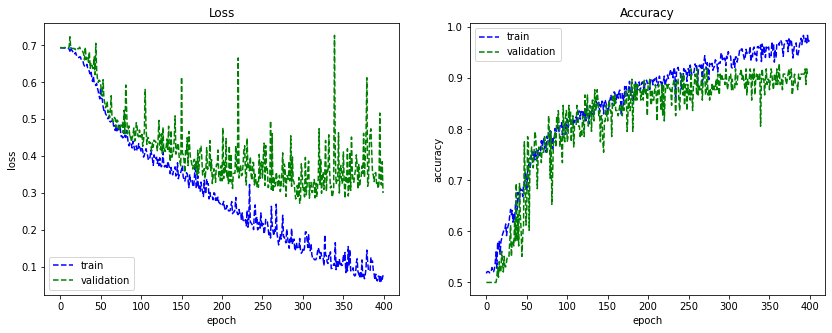

11/11 [==============================] - 0s 10ms/step - loss: 0.2694 - accuracy: 0.9083
Test loss: 0.2693907618522644
Test accuracy: 0.9082568883895874


109it [00:00, 10012.68it/s]

Confusion Matrix
[[51  7]
 [ 3 48]]
precision==   0.8727272727272727
Accuracy==    0.908256880733945
Recall==      0.9411764705882353
F1-Score==    0.9056603773584905
Kcappa==      0.8166218034993271


Random_seed_value== 22
Fold--------------> 2

TRAINING ON mobile_inception MODEL:-
Epoch 1/400
28/28 [==============================] - 4s 77ms/step - loss: 0.6939 - accuracy: 0.4857 - val_loss: 0.6927 - val_accuracy: 0.5714
Epoch 2/400
28/28 [==============================] - 2s 55ms/step - loss: 0.6936 - accuracy: 0.4892 - val_loss: 0.6908 - val_accuracy: 0.5714
Epoch 3/400
28/28 [==============================] - 2s 54ms/step - loss: 0.6935 - accuracy: 0.4892 - val_loss: 0.6917 - val_accuracy: 0.5714
Epoch 4/400
28/28 [==============================] - 2s 55ms/step - loss: 0.6926 - accuracy: 0.5200 - val_loss: 0.6935 - val_accuracy: 0.4286
Epoch 5/400
28/28 [==============================] - 2s 55ms/step - loss: 0.6943 - accuracy: 0.4721 - val_loss: 0.6934 - val_accuracy: 0.4286
Epoch 6/400
28/28 [==============================] - 2s 58ms/step - loss: 0.6933 - accuracy: 0.5017 - val_loss: 0.6940 - val_accuracy: 0.4286
Epoch 7/400
28/28 [==============================] - 2s 54ms/step

<Figure size 432x288 with 0 Axes>

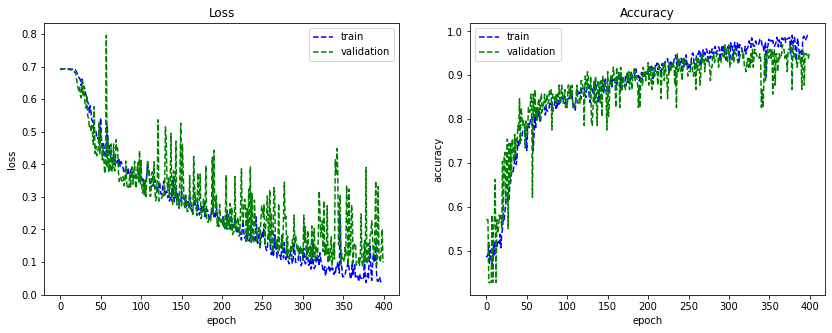

11/11 [==============================] - 0s 10ms/step - loss: 0.2484 - accuracy: 0.9266
Test loss: 0.24842895567417145
Test accuracy: 0.9266055226325989


109it [00:00, 7119.62it/s]

Confusion Matrix
[[41  6]
 [ 2 60]]
precision==   0.9090909090909091
Accuracy==    0.926605504587156
Recall==      0.967741935483871
F1-Score==    0.9374999999999999
Kcappa==      0.8488210818307906
Random_seed_value== 16


Fold--------------> 3

TRAINING ON mobile_inception MODEL:-
Epoch 1/400
28/28 [==============================] - 4s 76ms/step - loss: 0.6940 - accuracy: 0.5086 - val_loss: 0.6946 - val_accuracy: 0.4796
Epoch 2/400
28/28 [==============================] - 2s 56ms/step - loss: 0.6926 - accuracy: 0.5222 - val_loss: 0.6952 - val_accuracy: 0.4796
Epoch 3/400
28/28 [==============================] - 2s 57ms/step - loss: 0.6925 - accuracy: 0.5245 - val_loss: 0.6947 - val_accuracy: 0.4796
Epoch 4/400
28/28 [==============================] - 2s 55ms/step - loss: 0.6926 - accuracy: 0.5211 - val_loss: 0.6964 - val_accuracy: 0.4796
Epoch 5/400
28/28 [==============================] - 2s 57ms/step - loss: 0.6922 - accuracy: 0.5211 - val_loss: 0.6952 - val_accuracy: 0.4796
Epoch 6/400
28/28 [==============================] - 2s 56ms/step - loss: 0.6915 - accuracy: 0.5291 - val_loss: 0.6947 - val_accuracy: 0.4796
Epoch 7/400
28/28 [==============================] - 2s 56ms/step - loss: 0.6910 - accur

<Figure size 432x288 with 0 Axes>

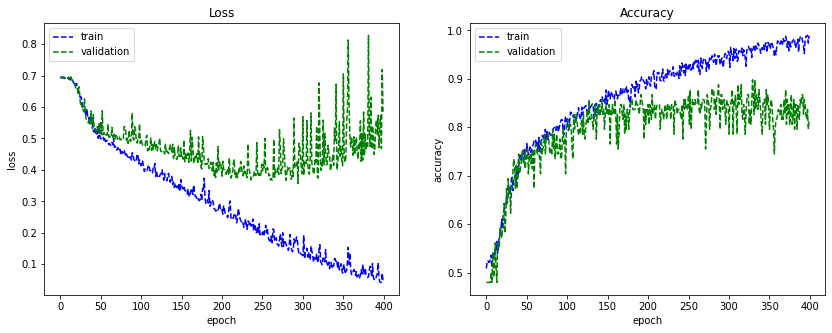

11/11 [==============================] - 0s 11ms/step - loss: 0.4403 - accuracy: 0.8716
Test loss: 0.440306693315506
Test accuracy: 0.8715596199035645


109it [00:00, 7511.73it/s]

Confusion Matrix
[[45 11]
 [ 3 50]]
precision==   0.819672131147541
Accuracy==    0.8715596330275229
Recall==      0.9433962264150944
F1-Score==    0.8771929824561403
Kcappa==      0.7439597315436242


In [ ]:
import random
precision_list=[];accuracy_list=[];recall_list=[];F1_list=[];K_cappa_list=[]
id=[32,22,16]
for fold in range (3): 
    #p=random.randint(1,42)
    p=id[fold]
    print('Random_seed_value== '+str(p))
    X_train_1,X_test,Y_train_1,Y_test=train_test_split(X,Y,test_size=0.1,random_state=p)
    X_train,X_val,Y_train,Y_val=train_test_split(X_train_1,Y_train_1,test_size=0.1,random_state=p)
    print("================================================================================================")
    print(f'Fold--------------> {fold+1}')
    from keras import backend as Ke
    Ke.clear_session()
    model = mobile_inception(dim, output_neurons, output_activation)
    opt =tf.keras.optimizers.Adam(learning_rate=0.001) 
    model.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy'])

    history = model.fit(X_train, Y_train, batch_size=32, epochs=400, verbose=1,validation_data=(X_val, Y_val))#,callbacks=[custom_early_stopping])    
    plt.figure(fold+1)
    plt.figure(figsize=(14,5))
    plt.subplot(121)
    plt.plot(history.history['loss'],'b--')
    plt.plot(history.history['val_loss'],'g--')
    plt.title('Loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='best')
 
    plt.subplot(122)
    plt.plot(history.history['accuracy'],'b--')
    plt.plot(history.history['val_accuracy'],'g--')
    plt.title('Accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='best')
    plt.show()   

    results=model.evaluate(X_test,Y_test,batch_size=10,verbose=1)
    print('Test loss:', results[0])
    print('Test accuracy:', results[1])

    predicted=model.predict(X_test,batch_size=60,verbose=0)
    Y_pred=predicted.argmax(axis=-1)
    Y_predicted=pd.DataFrame(Y_test,columns=['Asthma','Normal'])
    Y_ori=[];Asthma_t=0;Normal_t=0;
    for index,row in tqdm(Y_predicted.iterrows()):
        if row['Asthma']==1:
          Asthma_t=Asthma_t+1
          Y_ori.append(0)
        elif row['Normal']==1:
          Normal_t=Normal_t+1
          Y_ori.append(1)

    cm=confusion_matrix(Y_ori,Y_pred)
    print('Confusion Matrix');
    print(cm)
    precision = sklearn.metrics.precision_score(Y_ori,Y_pred)
    print('precision==   '+str(precision))
    accuracy=np.diag(cm).sum()/cm.sum().sum()
    print('Accuracy==    '+str(accuracy))
    recall = sklearn.metrics.recall_score(Y_ori,Y_pred)
    print('Recall==      '+str(recall))
    F1 = sklearn.metrics.f1_score(Y_ori,Y_pred)
    print('F1-Score==    '+str(F1))
    K_cappa = sklearn.metrics.cohen_kappa_score(Y_ori,Y_pred)
    print('Kcappa==      '+str(K_cappa))
    
    precision_list.append(precision)
    accuracy_list.append(accuracy)
    recall_list.append(recall)
    F1_list.append(F1)
    K_cappa_list.append(K_cappa)
    # save the plot varriables
    train_loss=history.history['loss']; filepath_tloss='train_loss_fold_'+ str(fold) +'.txt'; np.savetxt(filepath_tloss,train_loss)
    val_loss=history.history['val_loss']; filepath_vloss='val_loss_fold_'+ str(fold) +'.txt'; np.savetxt(filepath_vloss,val_loss)
    acc=history.history['accuracy'];      filepath_tacc='train_acc_fold_'+ str(fold) +'.txt'; np.savetxt(filepath_tacc,acc)
    val_acc=history.history['val_accuracy']; filepath_vacc='val_acc_fold_'+ str(fold) +'.txt'; np.savetxt(filepath_vacc,val_acc)
    # save model
    model.save_weights('/content/gdrive/MyDrive/all_disease_combined/fold_'+str(fold+1)+'.h5')
    print("================================================================================================")


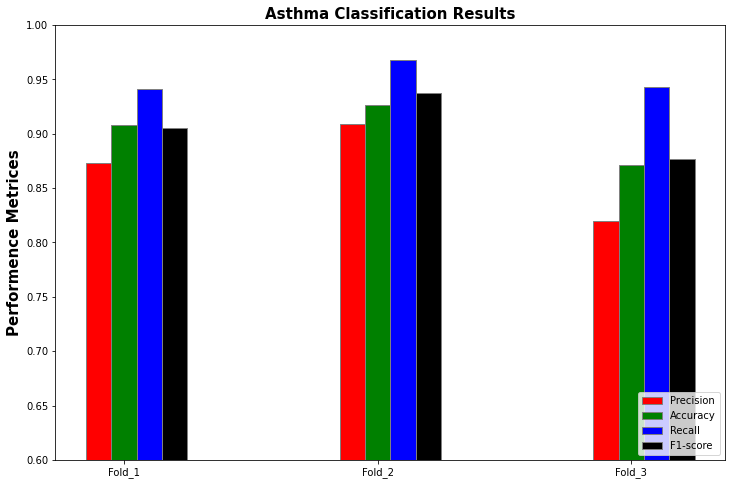

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
 
# set width of bar
barWidth = 0.1
fig = plt.subplots(figsize =(12, 8))
# set height of bar
precisions= np.array(precision_list)
accuracy= np.array(accuracy_list)
recall= np.array(recall_list)
f1s= np.array(F1_list)
# Set position of bar on X axis
br1 = np.arange(len(precisions))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
# Make the plot
plt.bar(br1,precisions , color ='r', width = barWidth,
        edgecolor ='grey', label ='Precision')
plt.bar(br2, accuracy, color ='g', width = barWidth,
        edgecolor ='grey', label ='Accuracy')
plt.bar(br3, recall, color ='b', width = barWidth,
        edgecolor ='grey', label ='Recall')
plt.bar(br4, f1s, color ='k', width = barWidth,
        edgecolor ='grey', label ='F1-score')
# Adding Xticks
plt.ylabel('Performence Metrices', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(precisions))],
        ['Fold_1', 'Fold_2', 'Fold_3'])
plt.title('Asthma Classification Results',fontweight ='bold', fontsize = 15) 
plt.legend(loc='lower right')
plt.ylim(0.6,1)
plt.show()

In [ ]:
print('Mean Accuracy= '+str(round(np.mean(accuracy),2)))
print('Mean Recall= '+str(round(np.mean(recall),2)))
print('Mean F1-scoe= '+str(round(np.mean(f1s),2)))
print('Mean precision= '+str(round(np.mean(precisions),2)))
print('Mean K_cappa= '+str(round(np.mean(np.array(K_cappa_list)),2)))

Mean Accuracy= 0.9
Mean Recall= 0.95
Mean F1-scoe= 0.91
Mean precision= 0.87
Mean K_cappa= 0.8


**Result of published paper : ** 
[paper](https://ieeexplore.ieee.org/stamp/stamp.jsp?arnumber=9756949)

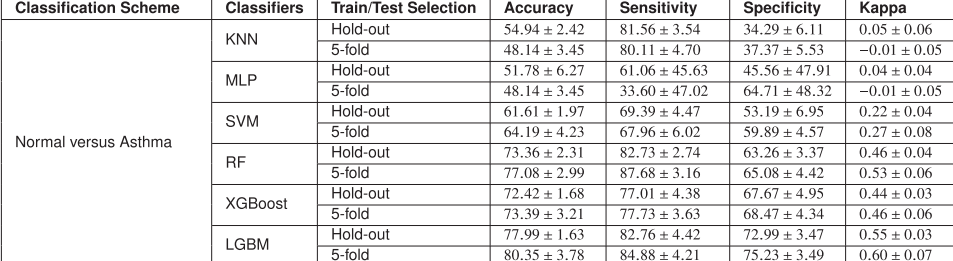

**t-SNE Visualisation**

In [ ]:
#loading the autoencoder model
from tensorflow.keras.models import Model
import tensorflow as tf
model.load_weights("/content/gdrive/MyDrive/Asthma_Classification/seed_22_fold_2_93.h5")
#model.load_weights
out_dense= Model(inputs=model.input,outputs=model.get_layer('global_average_pooling2d').output)
Y_denseout = out_dense.predict(X_test)
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2,learning_rate='auto',init='random')
Y_embedded = tsne.fit_transform(Y_denseout)
q=np.array(Y_ori)
label_l=[]
for i in range (109):
  if q[i]==0:
    label_l.append('Asthma')
  else:
    label_l.append('Normal')
Label_ar=np.array(label_l)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 't-SNE plot After applying Lightweight CNN')

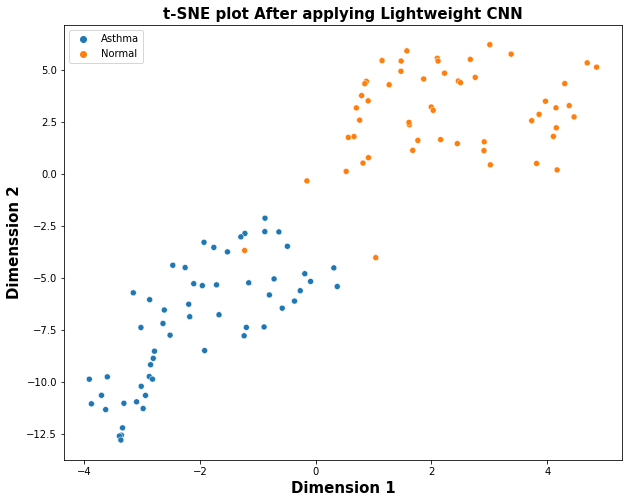

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,8))
sns.scatterplot(Y_embedded[:,0], Y_embedded[:,1], hue=Label_ar)
plt.xlabel("Dimension 1",fontweight ='bold', fontsize = 15);plt.ylabel("Dimenssion 2",fontweight ='bold', fontsize = 15)
plt.title('t-SNE plot After applying Lightweight CNN',fontweight ='bold', fontsize = 15)